In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

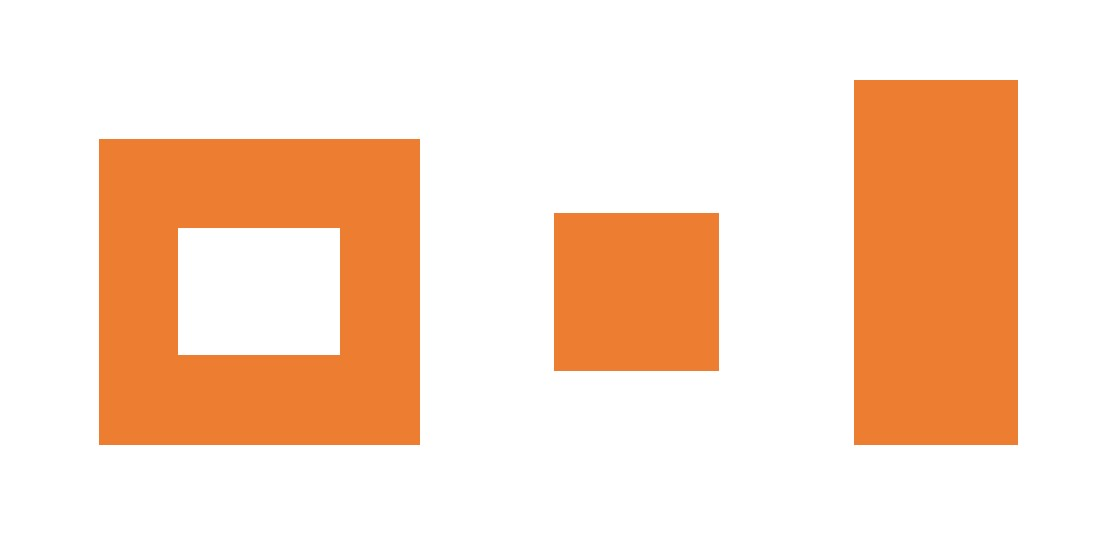

In [ ]:
image = cv2.imread('/content/exemplo1.jpg')
cv2_imshow(image)

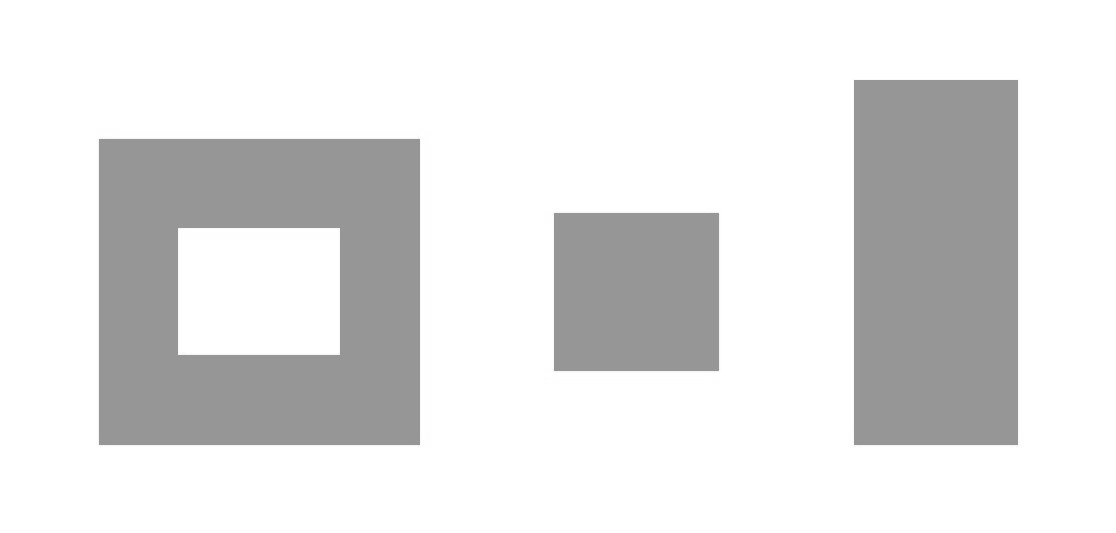

In [ ]:
#Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

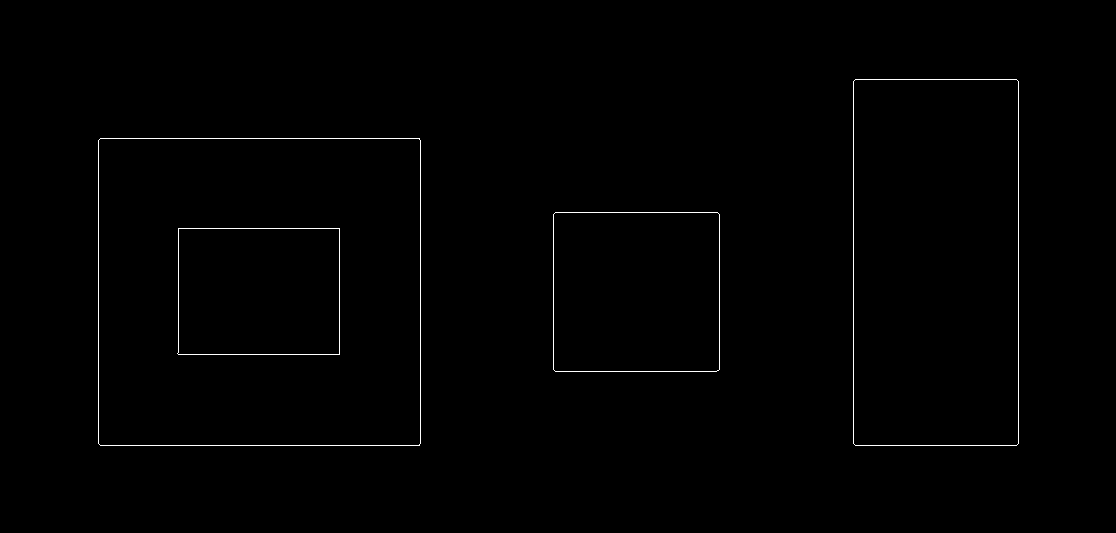

In [ ]:
#CannyEdges (thresholding: alto e baixo)
edged = cv2.Canny(gray, 30, 200)
cv2_imshow(edged)

In [ ]:
#Finding Contours
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Número de contornos encontrados: " + str(len(contours)))

Número de contornos encontrados: 3


**cv2.RETR_EXTERNAL**: Especifica o modo de recuperação de contornos. cv2.RETR_EXTERNAL faz com que a função encontre apenas os contornos externos dos objetos na imagem. Se você deseja encontrar todos os contornos, incluindo os internos (como contornos dentro de objetos), você pode usar cv2.RETR_LIST ou cv2.RETR_TREE.

**cv2.CHAIN_APPROX_NONE**: Define o método de aproximação de contornos. cv2.CHAIN_APPROX_NONE faz com que a função encontre todos os pontos ao longo do contorno, sem qualquer compressão ou simplificação. Em outras palavras, todos os pontos da borda do contorno serão retornados. Se você quiser simplificar o contorno, pode usar cv2.CHAIN_APPROX_SIMPLE, que apenas retorna os pontos principais do contorno.


- **RETR_EXTERNAL** (Externo)
- **RETR_LIST** (Todos)

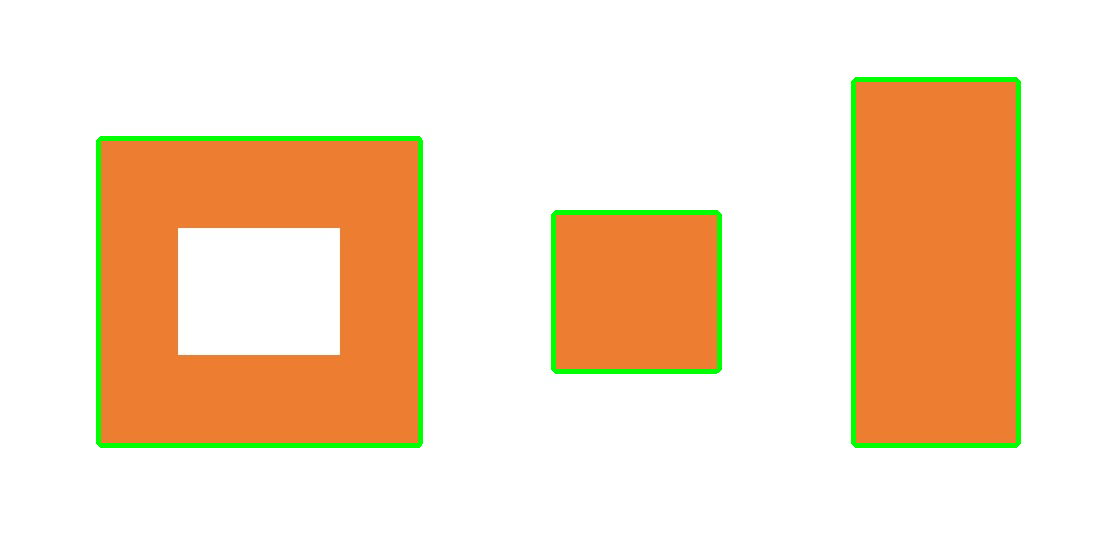

In [ ]:
cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2_imshow(image)

## cv2.findContours(image, Retrieval Mode, Approximation Method)

**-1:** Especifica o índice do contorno a ser desenhado. Se você passar -1, isso significa que todos os contornos da lista serão desenhados. Caso contrário, você pode passar um índice específico para desenhar apenas um contorno específico.

**(0, 255, 0):** Define a cor dos contornos. A cor é especificada em formato BGR (Blue, Green, Red), que é o padrão de cores usado pelo OpenCV. No caso (0, 255, 0), a cor é verde. Você pode ajustar este valor para desenhar contornos em diferentes cores.

**3:** Especifica a espessura da linha do contorno. No caso, 3 significa que a linha do contorno será desenhada com uma espessura de 3 pixels. Se você passar um valor maior, a linha será mais espessa, e se passar um valor menor, a linha será mais fina.

# Sorting Contours

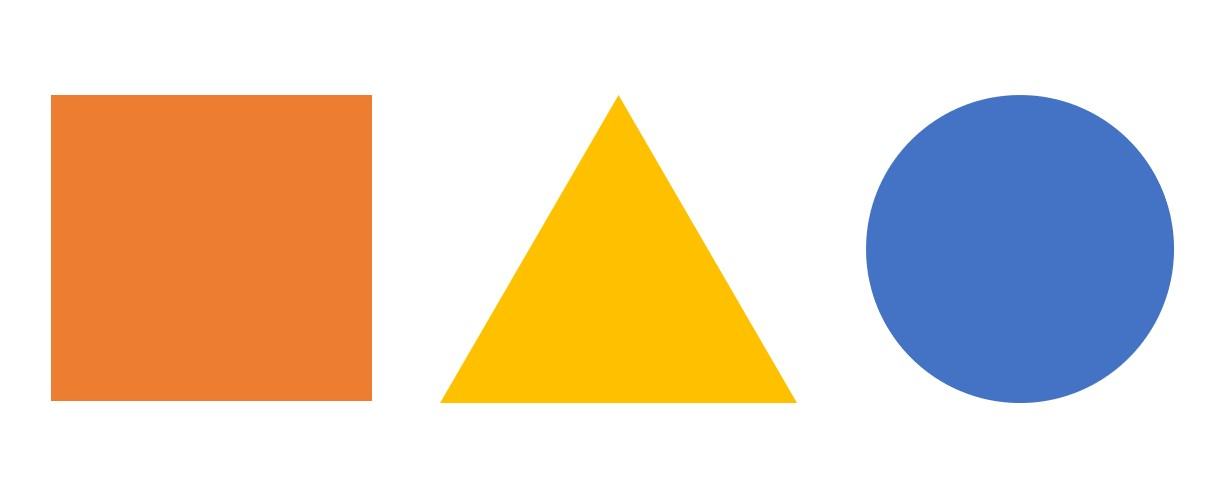

In [ ]:
image = cv2.imread('/content/exemplo2.jpg')
cv2_imshow(image)

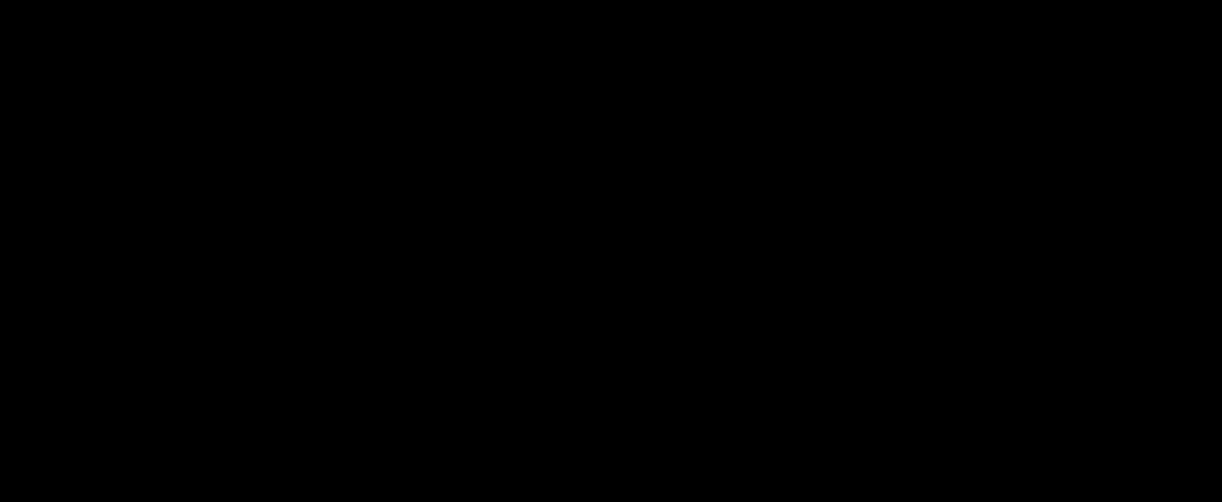

In [ ]:
black_image = np.zeros((image.shape[0], image.shape[1], 3))
cv2_imshow(black_image)

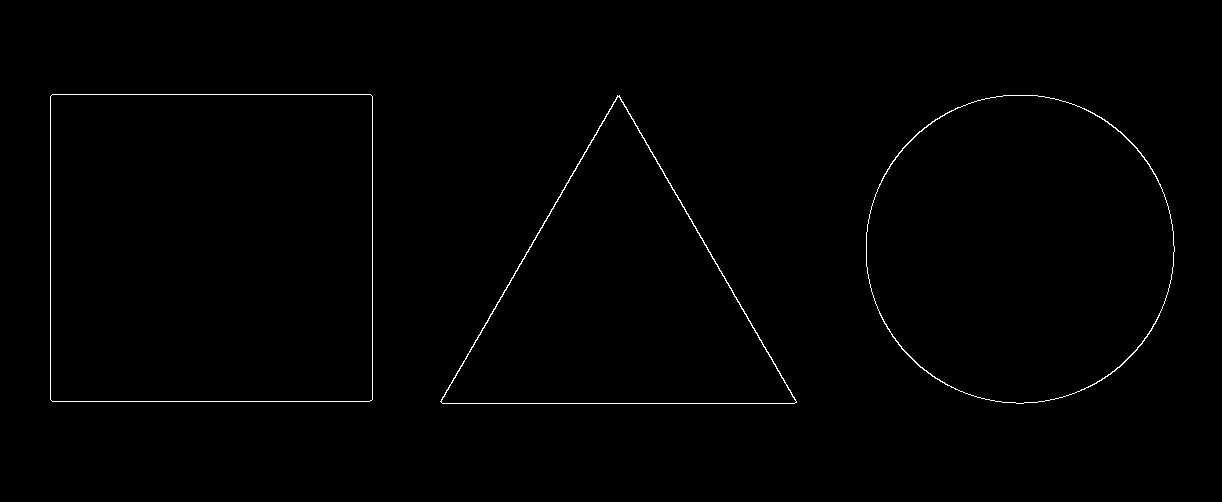

In [ ]:
original_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 50, 200)
cv2_imshow(edged)

In [ ]:
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Número de contornos encontrados: " + str(len(contours)))

Número de contornos encontrados: 3


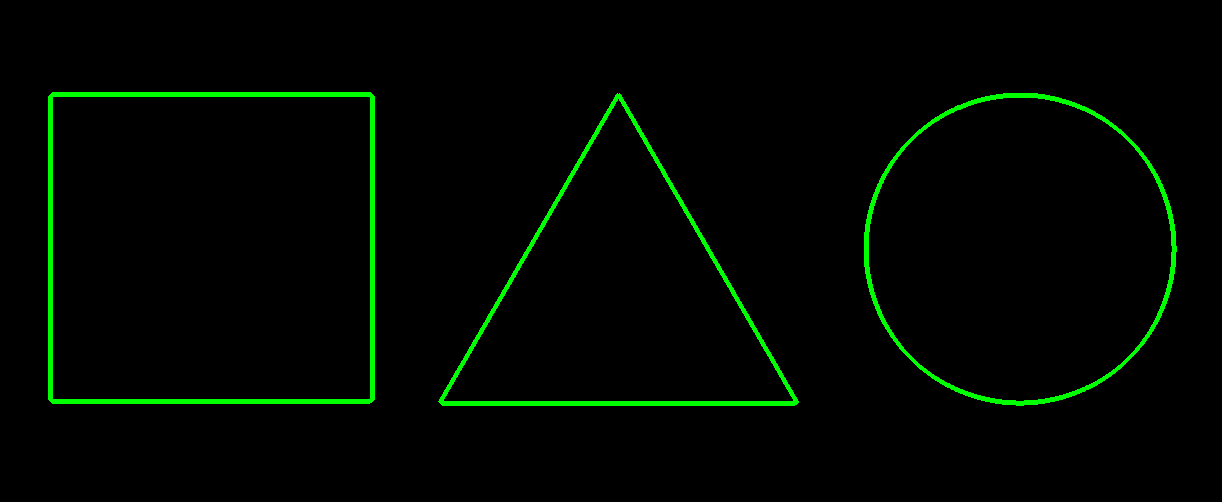

In [ ]:
cv2.drawContours(black_image, contours, -1, (0,255,0), 3)
cv2_imshow(black_image)

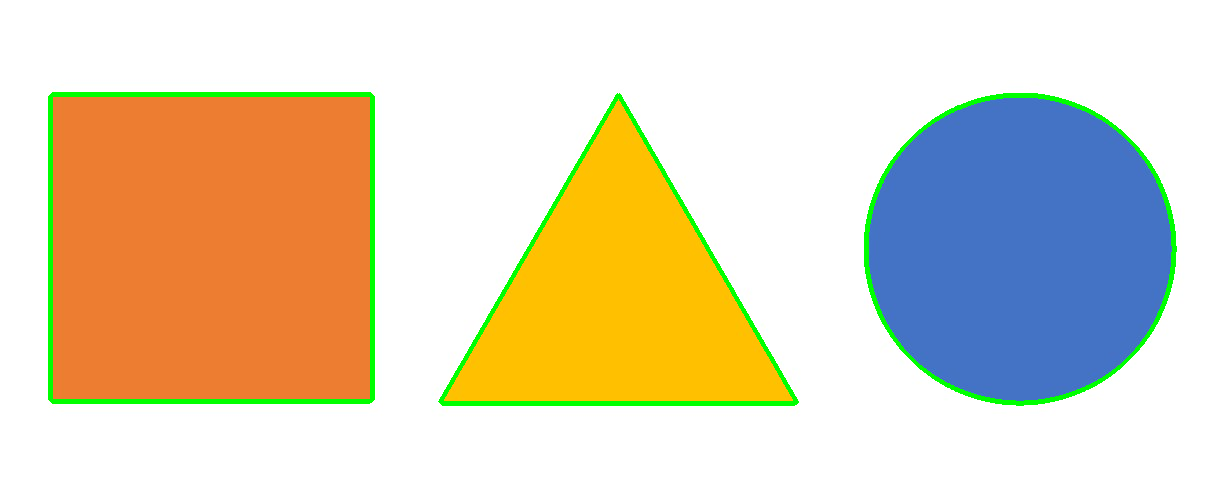

In [ ]:
cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2_imshow(image)

In [ ]:
print(contours)

(array([[[1003,   95]],

       [[1002,   96]],

       [[1001,   96]],

       ...,

       [[1006,   95]],

       [[1005,   95]],

       [[1004,   95]]], dtype=int32), array([[[617,  95]],

       [[617,  96]],

       [[616,  97]],

       ...,

       [[619,  96]],

       [[619,  95]],

       [[618,  96]]], dtype=int32), array([[[52, 94]],

       [[51, 95]],

       [[50, 96]],

       ...,

       [[55, 94]],

       [[54, 94]],

       [[53, 94]]], dtype=int32))


In [ ]:
#Retorna a área de cada contorno
def get_contor_areas(contours):
  all_areas = []
  for cnt in contours:
    area = cv2.contourArea(cnt)
    all_areas.append(area)
  return all_areas

In [ ]:
#Contornos antes de ordenar
print(get_contor_areas(contours))

#Ordena por tamanho de área do Maior para o Menor
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print(get_contor_areas(sorted_contours))

[74627.0, 55326.5, 98845.0]
[98845.0, 74627.0, 55326.5]


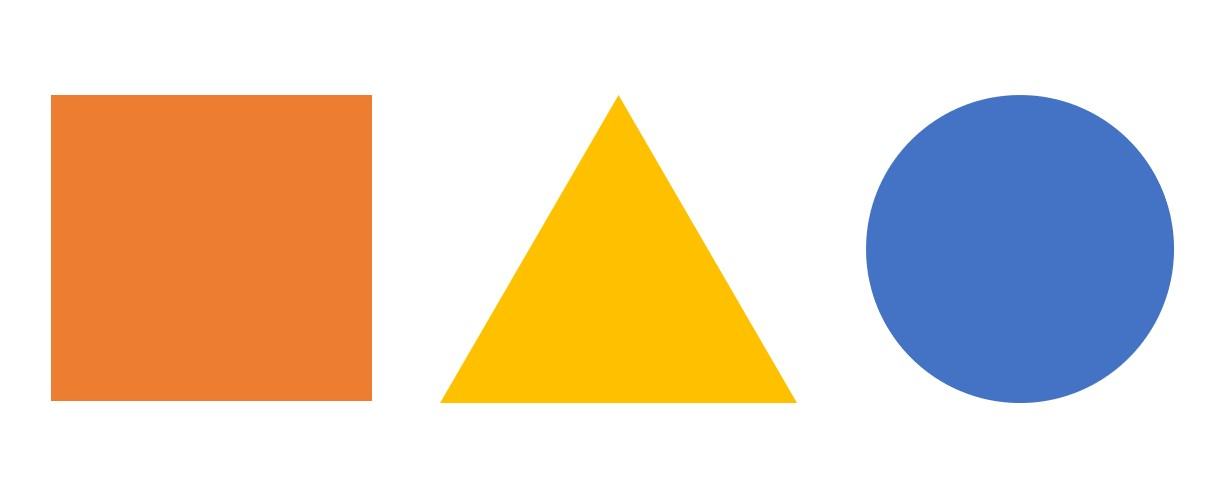

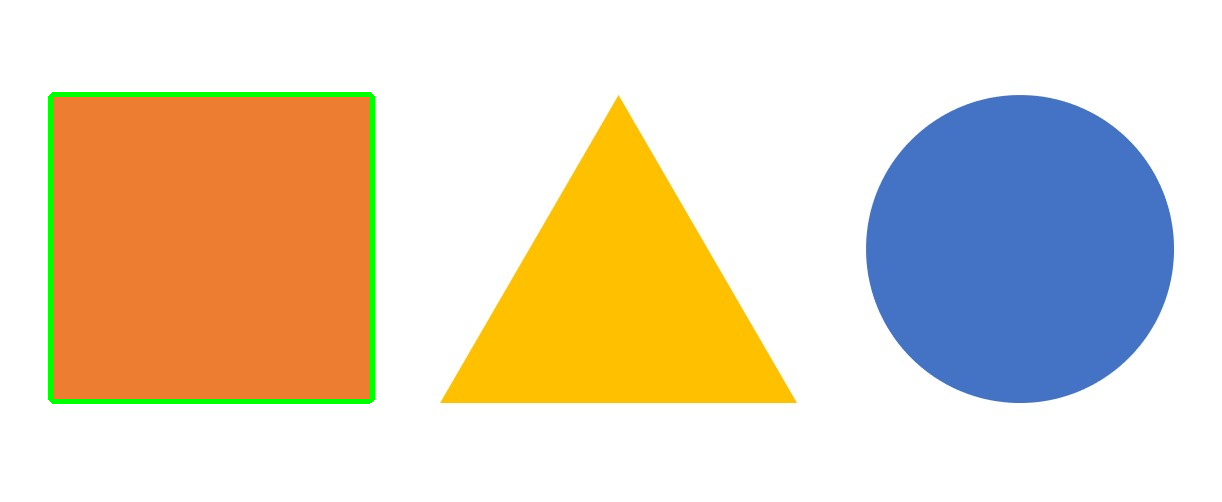

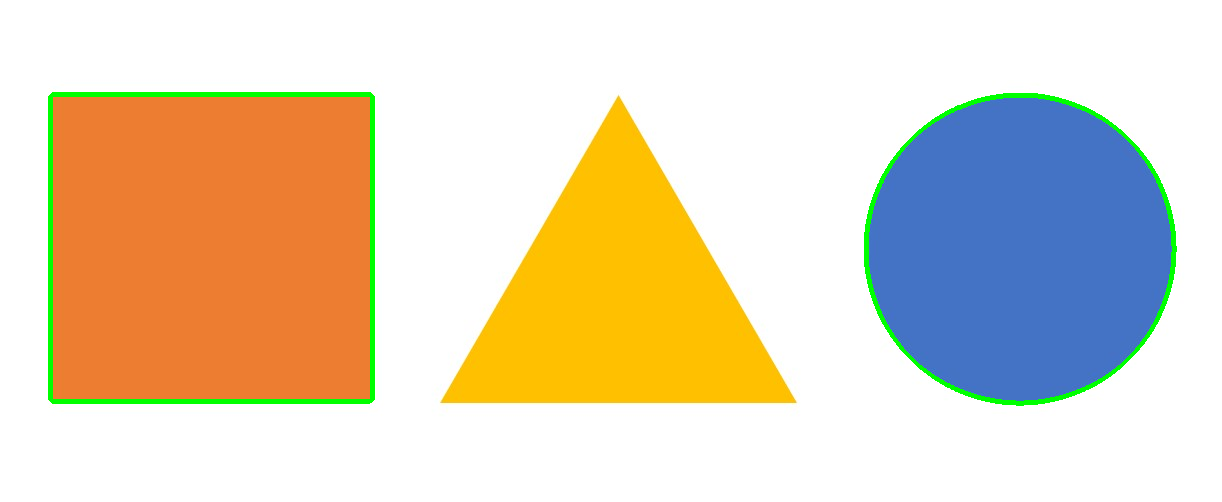

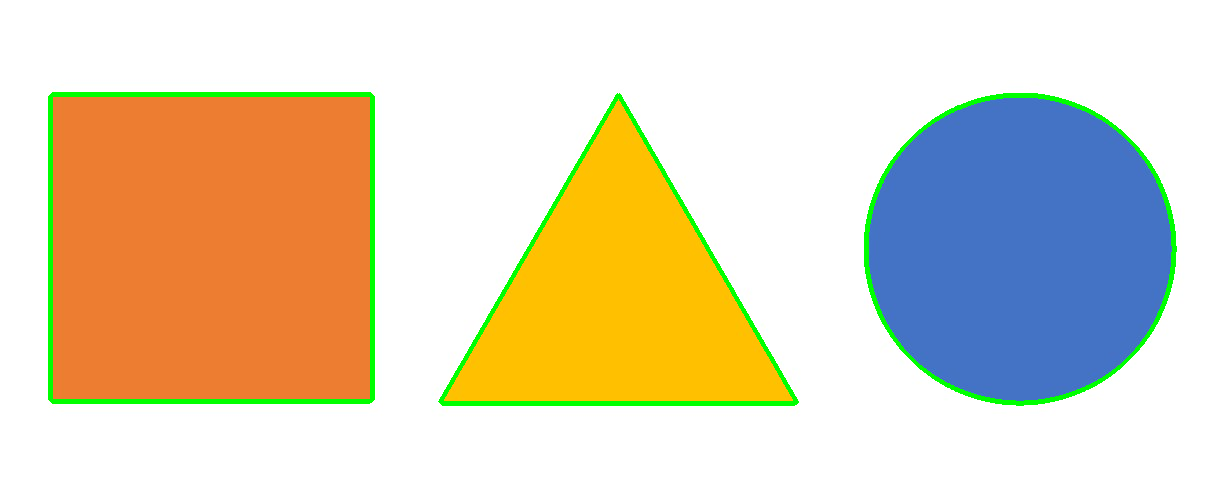

In [ ]:
#Recriar a imagem original
cv2_imshow(original_image)
image = original_image.copy()

#Desenhar cada um dos contornos
cv2.drawContours(image, sorted_contours[0], -1, (0,255,0), 3)
cv2_imshow(image)

cv2.drawContours(image, sorted_contours[1], -1, (0,255,0), 3)
cv2_imshow(image)

cv2.drawContours(image, sorted_contours[2], -1, (0,255,0), 3)
cv2_imshow(image)


# Label

In [ ]:
def cx_cy(c):
  M = cv2.moments(c)
  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])
  return (cx, cy)

def x_cord_contour(contours):
  #Retorna o valor centroide de X do contorno
  if cv2.contourArea(contours) > 10:
    M = cv2.moments(contours)
    return (int(M['m10']/M['m00']))

In [ ]:
def label_contour_center(image, c, i):
  cx, cy = cx_cy(c)
  cv2.circle(image, (cx, cy), 10, (0,0,255), -1)
  return image

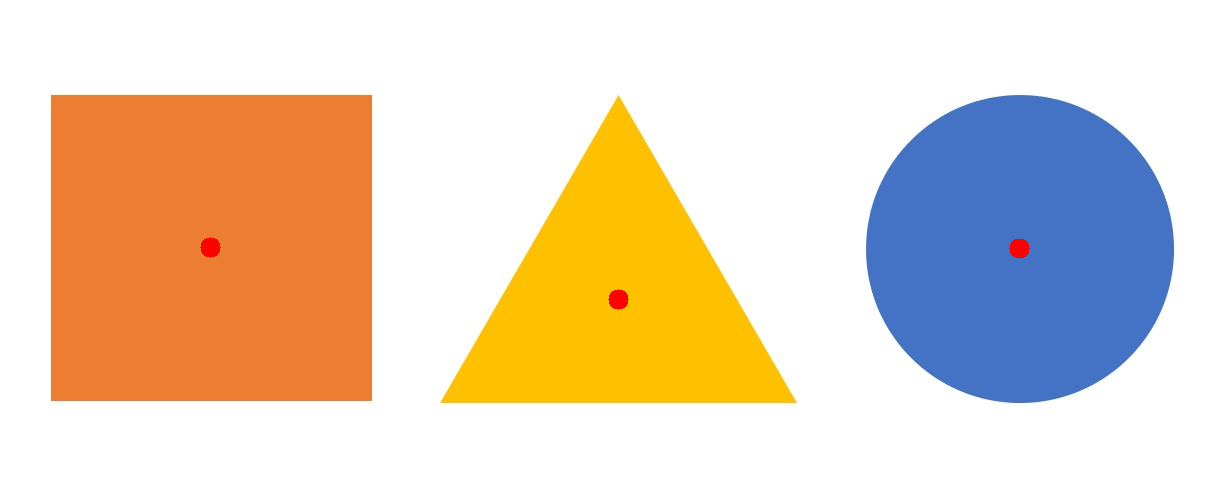

In [ ]:
image = original_image.copy()

for (i, c) in enumerate(contours):
  image = label_contour_center(image, c, i)

cv2_imshow(image)

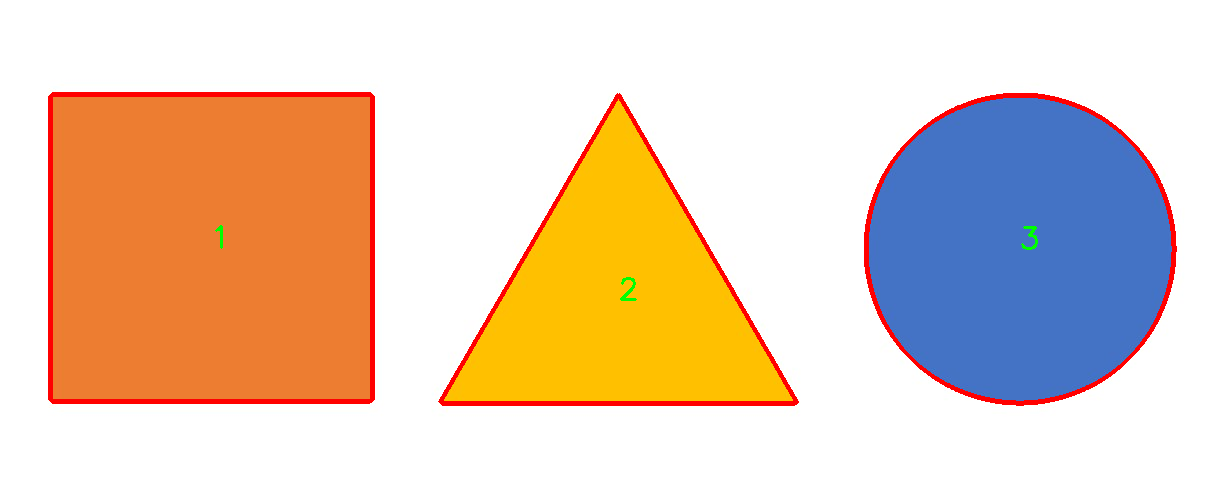

In [ ]:
image = original_image.copy()

#Ordenado da esquerda para a direita
sorted_contours = sorted(contours, key=x_cord_contour, reverse=False)

#Escrevendo o valor em cada um dos elementos
for (i,c) in enumerate(sorted_contours):
  cv2.drawContours(image, [c], -1, (0,0,255), 3)
  cx, cy = cx_cy(c)
  cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

cv2_imshow(image)

# Recortando uma imagem

In [ ]:
image = original_image.copy()

#Recortando imagens
for (i,c) in enumerate(sorted_contours):
  (x,y,w,h) = cv2.boundingRect(c)
  cropped_contour = image[y:y + h, x:x + w]
  image_name = "corte_" + str(i + 1) + ".jpg"
  print(image_name)
  cv2.imwrite(image_name, cropped_contour)

corte_1.jpg
corte_2.jpg
corte_3.jpg


# Aproximação de Contorno

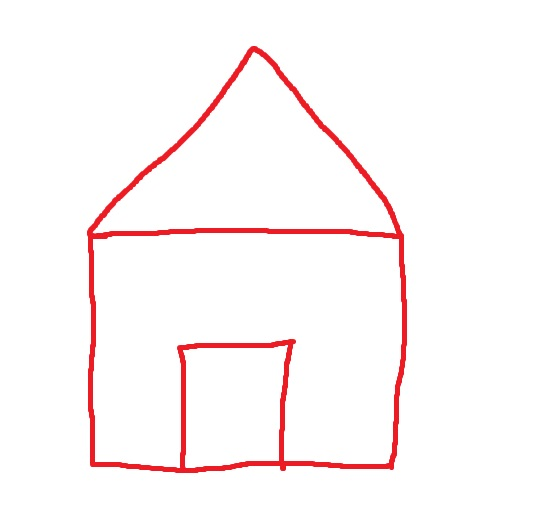

In [ ]:
image = cv2.imread('/content/exemplo3.jpg')
original_image = image.copy()
cv2_imshow(image)

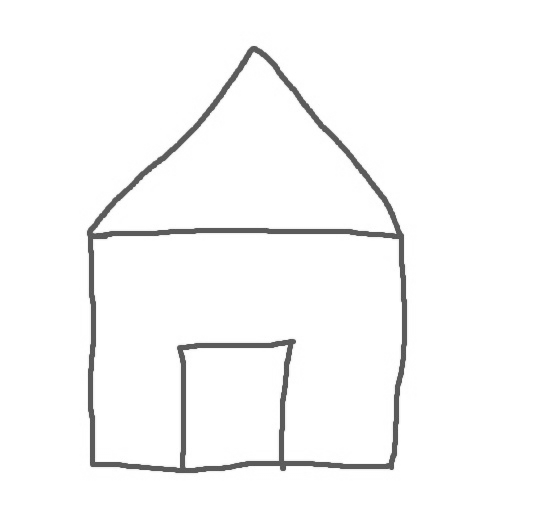

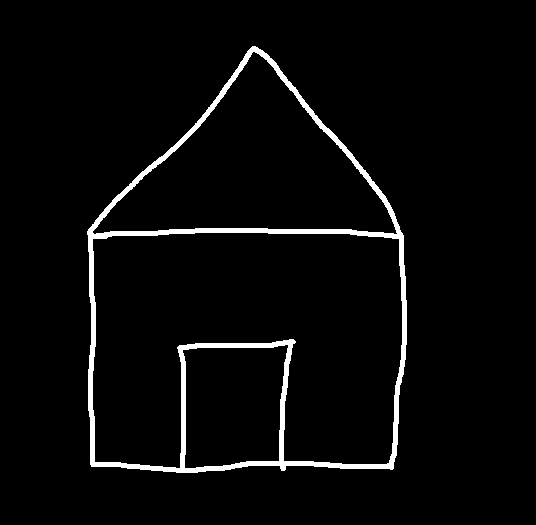

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

In [ ]:
#Encontrando os contornos
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

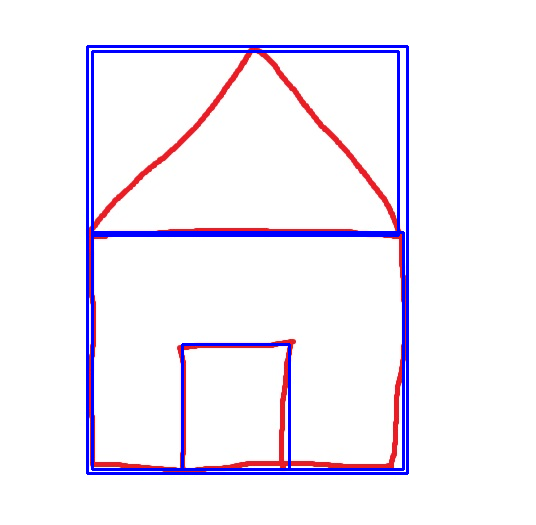

In [ ]:
for c in contours:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)

cv2_imshow(image)

## cv2.approxPolyDP

- contour — is the individual contour we wish to approximate
- Approximation Accuracy — Important parameter is determining the accuracy of the approximation. Small values give precise- approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- Closed a Boolean value that states whether the approximate contour should be open or closed

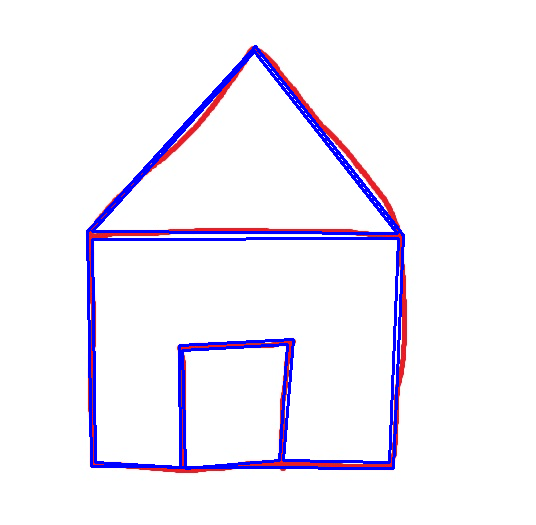

In [ ]:
image = original_image.copy()

for c in contours:
  #Calculando a acuracidade e porcentagem do perimetro do contorno
  accuracy = 0.03 * cv2.arcLength(c, True)
  aprox = cv2.approxPolyDP(c, accuracy, True)
  cv2.drawContours(image, [aprox], 0, (255,0,0), 2)

cv2_imshow(image)

# Convex Hull

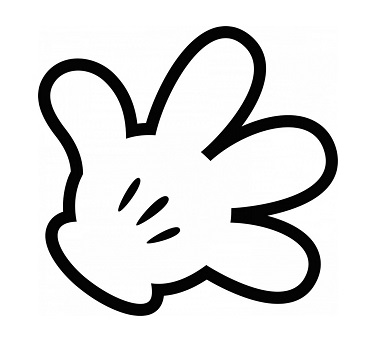

In [ ]:
image = cv2.imread('/content/exemplo4.jpg')
original_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray)

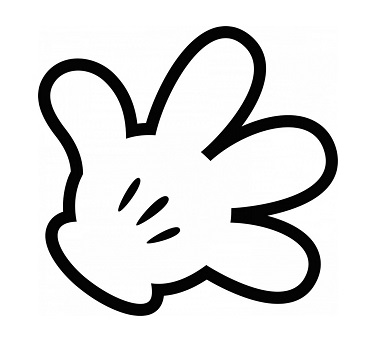

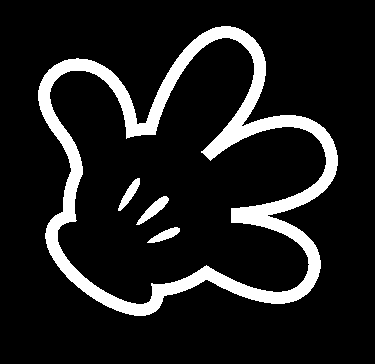

In [ ]:
image = cv2.imread("/content/exemplo4.jpg")
original_image = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

5


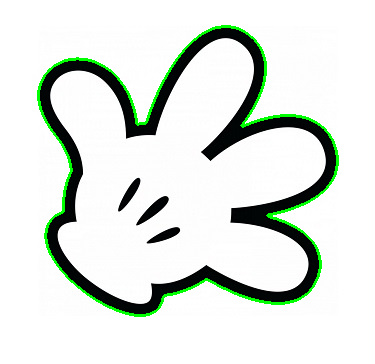

In [ ]:
image = original_image.copy()

#Encontrando os contornos
contours, hierarquy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

#Filtrando o maior contorno
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=True)
contours = contours.pop(0)

image = original_image.copy()

for c in contours:
  hull = cv2.convexHull(c)
  cv2.drawContours(image, [hull], 0, (0,255,0), 2)

cv2_imshow(image)


# Comparativos

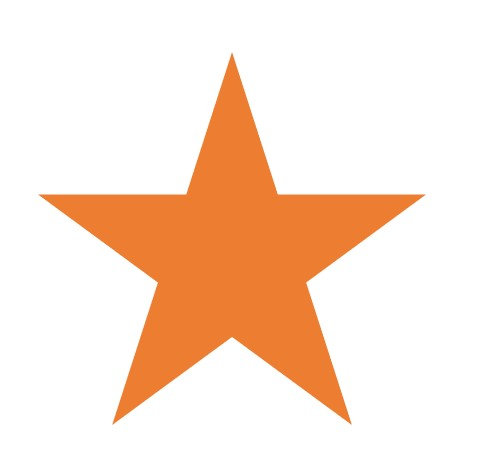

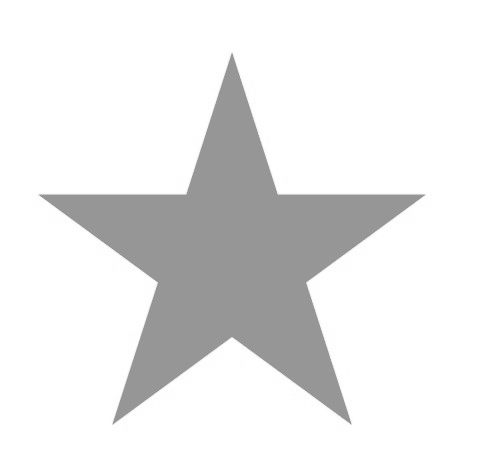

In [ ]:
template = cv2.imread('/content/exemplo5.jpg')
cv2_imshow(template)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_template)

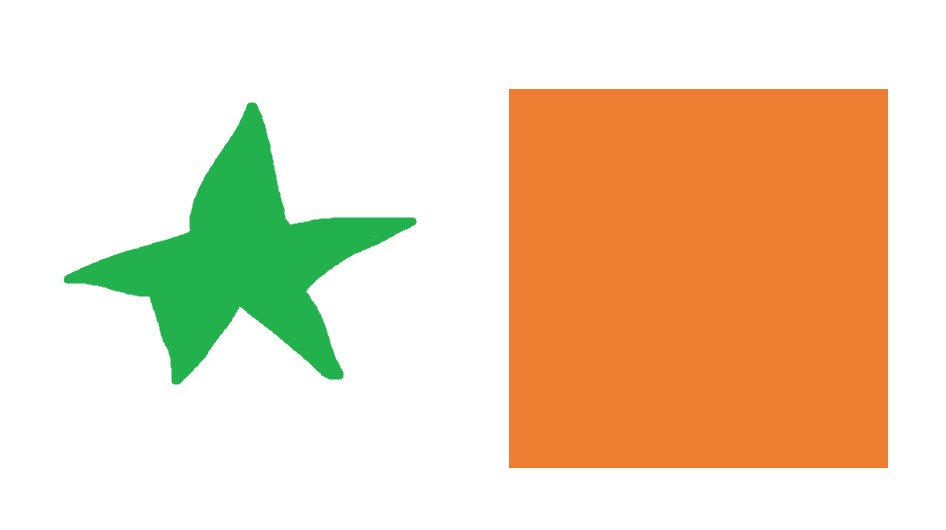

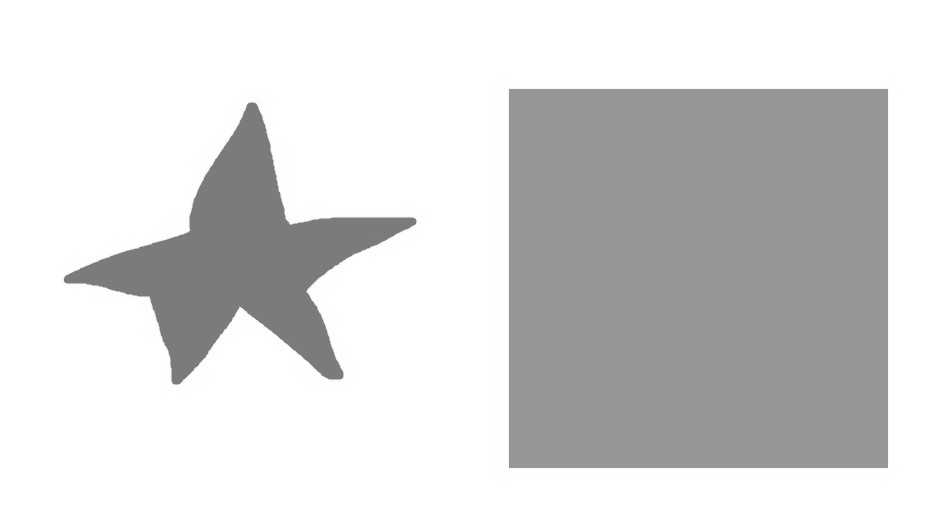

In [ ]:
target = cv2.imread('/content/exemplo6.jpg')
cv2_imshow(target)
gray_target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_target)

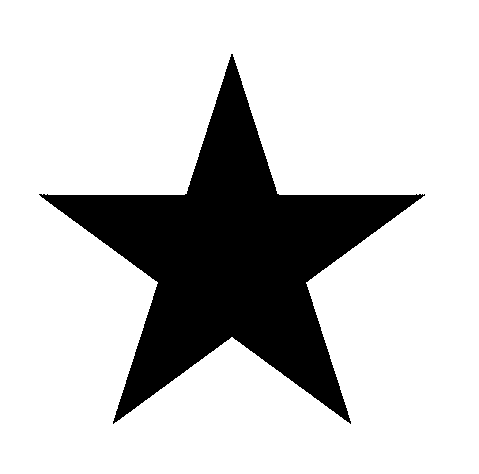

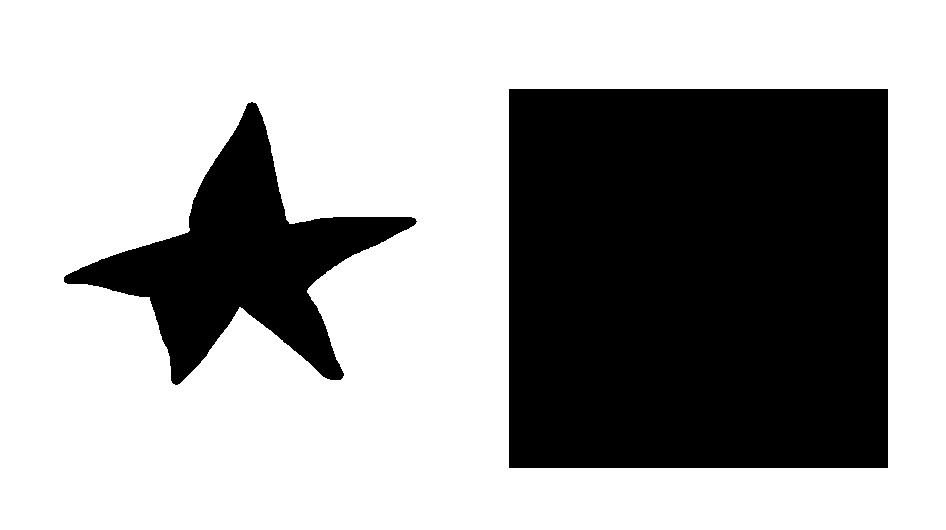

In [ ]:
ret, thresh1 = cv2.threshold(gray_template, 200, 255, 0)
cv2_imshow(thresh1)
ret, thresh2 = cv2.threshold(gray_target, 200, 255, 0)
cv2_imshow(thresh2)

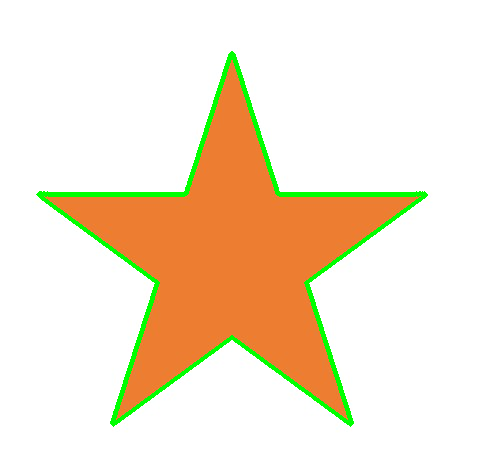

In [ ]:
image = template.copy()

contours, hierarchy = cv2.findContours(thresh1.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
sorted_contour = sorted(contours, key=cv2.contourArea, reverse=True)
template_contour = sorted_contour[1]
cv2.drawContours(image, template_contour, -1, (0,255,0), 3)
cv2_imshow(image)

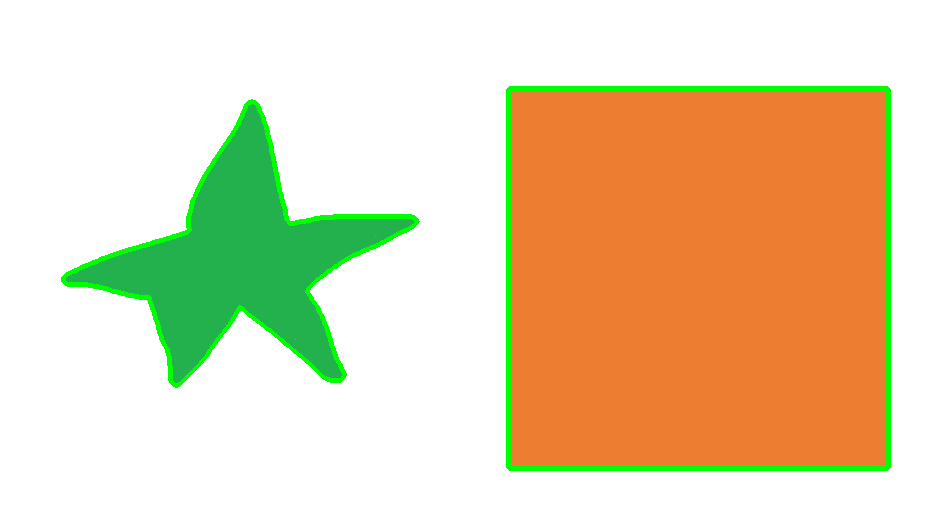

In [ ]:
image = target.copy()

contours, hierarchy = cv2.findContours(thresh2.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
sorted_contour = sorted(contours, key=cv2.contourArea, reverse=True)
sorted_contour.pop(0)  #Remove o primeiro valor

for c in sorted_contour:
  cv2.drawContours(image, c, -1, (0,255,0), 3)
cv2_imshow(image)

Parecido:0.21751820460161686
Parecido:0.03277226778674214


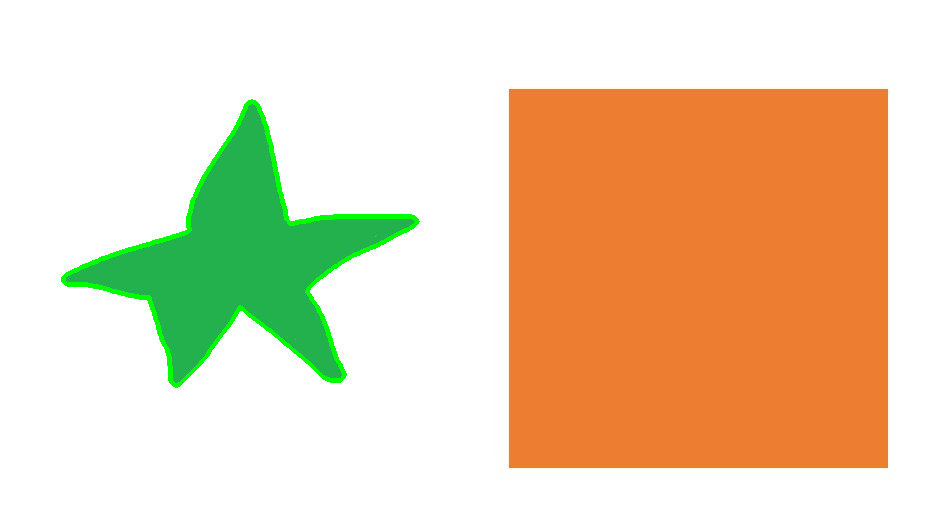

In [ ]:
image = target.copy()

closest = 1
for c in sorted_contour:
  match = cv2.matchShapes(template_contour, c, 1, 0.0)
  print("Parecido:" + str(match))
  if match < closest:
    closest = match
    closest_contour = c

cv2.drawContours(image, [closest_contour], -1, (0,255,0), 3)
cv2_imshow(image)